In [2]:
import pandas as pd

# df = pd.read_csv("hf://datasets/jettisonthenet/timeseries_trending_youtube_videos_2019-04-15_to_2020-04-15/videostats.csv")
df = pd.read_csv("youtube_dataset.csv")
df.head()

,videostatsid,ytvideoid,views,comments,likes,dislikes,timestamp
0,1,0GLbwkfhYZk,5722228,28229,185188,10860,2019-04-15 04:42:49
1,2,O4NB73HTlxI,3673770,31565,278477,4705,2019-04-15 04:42:50
2,3,VVRcXtSjPcE,253613,1025,4587,87,2019-04-15 04:42:51
3,4,adzYW5DZoWs,21567972,79208,478496,61703,2019-04-15 04:42:51
4,5,p_8yK2kmxoo,2385064,10703,133304,1323,2019-04-15 04:42:52


# Explore data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541128 entries, 0 to 1541127
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   videostatsid  1541128 non-null  int64 
 1   ytvideoid     1541128 non-null  object
 2   views         1541128 non-null  int64 
 3   comments      1541128 non-null  int64 
 4   likes         1541128 non-null  int64 
 5   dislikes      1541128 non-null  int64 
 6   timestamp     1541128 non-null  object
dtypes: int64(5), object(2)
memory usage: 82.3+ MB


In [4]:
df.describe()

,videostatsid,views,comments,likes,dislikes
count,1.541128e+06,1.541128e+06,1.541128e+06,1.541128e+06,1.541128e+06
mean,7.705645e+05,2.334113e+06,1.062863e+04,1.140499e+05,4.600412e+03
std,4.448855e+05,4.739228e+06,4.690702e+04,2.811799e+05,7.602899e+04
min,1.000000e+00,3.969000e+03,0.000000e+00,1.040000e+02,6.000000e+00
25%,3.852828e+05,6.039978e+05,1.991000e+03,1.911500e+04,4.710000e+02
50%,7.705645e+05,1.092915e+06,4.037000e+03,4.295800e+04,1.024000e+03
75%,1.155846e+06,2.185136e+06,8.882000e+03,9.950500e+04,2.515000e+03
max,1.541128e+06,1.527469e+08,2.919587e+06,8.517540e+06,7.027836e+06


## Data distribution

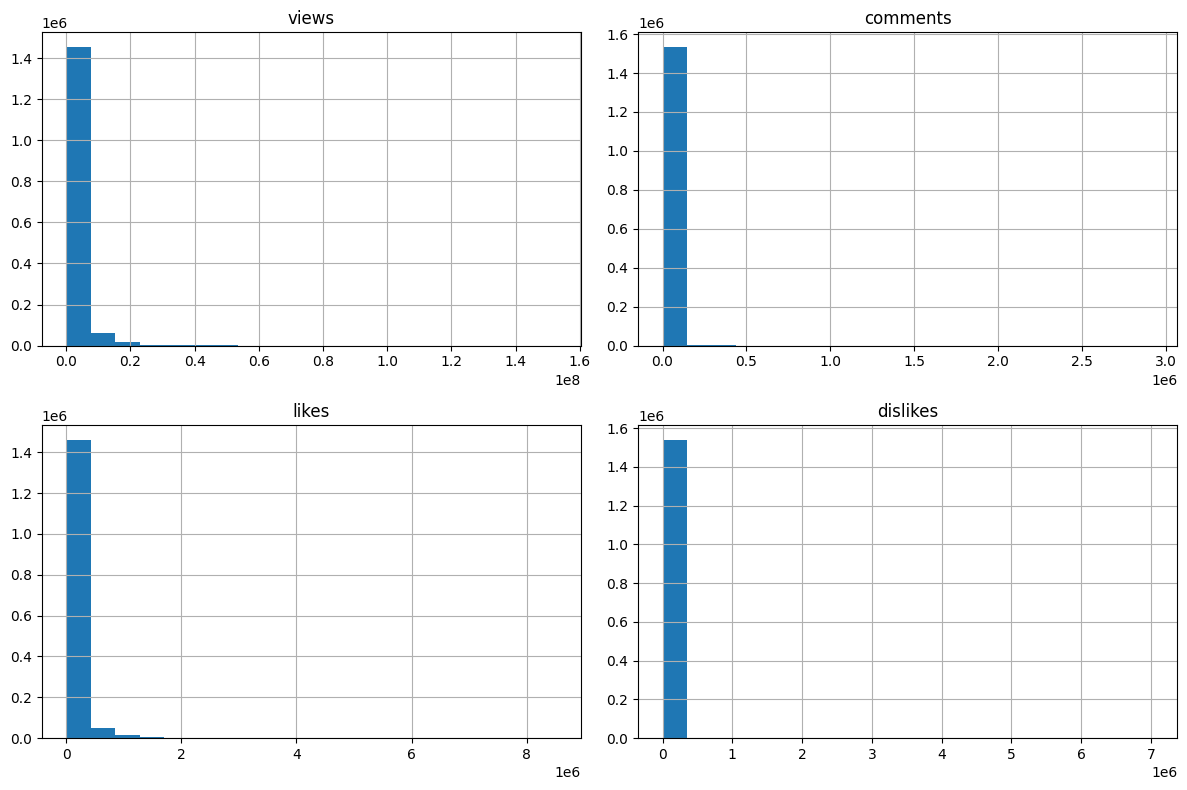

In [5]:
import matplotlib.pyplot as plt
cols = ['views', 'comments', 'likes', 'dislikes']
df[cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

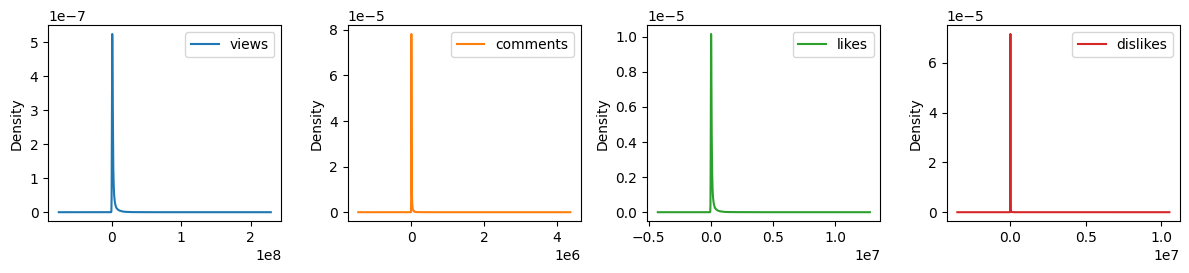

In [6]:
df[cols].plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(12, 10))
plt.tight_layout()
plt.show()

## Duplicates and nans

In [7]:
df[df.duplicated()]

,videostatsid,ytvideoid,views,comments,likes,dislikes,timestamp


In [8]:
df[df.duplicated(subset=['videostatsid'])]

,videostatsid,ytvideoid,views,comments,likes,dislikes,timestamp


In [9]:
df.loc[df.isna().any(axis=1)]


,videostatsid,ytvideoid,views,comments,likes,dislikes,timestamp


In [10]:
len(df['ytvideoid'].unique())

11369

## Exploring timestamp

In [14]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].dt.round('30min')

df = df.sort_values(['ytvideoid', 'timestamp'])

In [11]:
df.groupby('ytvideoid')['timestamp'].count().describe()

count    11369.000000
mean       135.555282
std         77.114336
min          1.000000
25%         84.000000
50%        136.000000
75%        181.000000
max        628.000000
Name: timestamp, dtype: float64

In [15]:
df['time_diff'] = df.groupby('ytvideoid')['timestamp'].diff()
df['time_diff'].describe()

count                      1529759
mean     0 days 00:29:53.520155789
std      0 days 00:44:15.257426654
min                0 days 00:00:00
25%                0 days 00:30:00
50%                0 days 00:30:00
75%                0 days 00:30:00
max                7 days 19:00:00
Name: time_diff, dtype: object

# Clean data

Only rows with 30 min separation

In [75]:
df_30min = df[df['time_diff'] == pd.Timedelta('30min')]
first_rows = df.groupby('ytvideoid').head(1).index
df = df.loc[df_30min.index.union(first_rows)]
df.drop(columns='time_diff', inplace=True)
df.head()

,videostatsid,ytvideoid,views,comments,likes,dislikes,timestamp
0,1,0GLbwkfhYZk,5722228,28229,185188,10860,2019-04-15 04:30:00
1,2,O4NB73HTlxI,3673770,31565,278477,4705,2019-04-15 04:30:00
2,3,VVRcXtSjPcE,253613,1025,4587,87,2019-04-15 04:30:00
3,4,adzYW5DZoWs,21567972,79208,478496,61703,2019-04-15 04:30:00
4,5,p_8yK2kmxoo,2385064,10703,133304,1323,2019-04-15 04:30:00


Onyl videos with more than 48 (24hs) registers

In [76]:
min_rows = 48
df = df.groupby('ytvideoid').filter(lambda x: len(x) >= min_rows)
df = df.sort_values(['ytvideoid', 'timestamp'])
df

,videostatsid,ytvideoid,views,comments,likes,dislikes,timestamp
2802,2803,--Oly6yY5To,354013,2472,8037,1208,2019-04-15 11:30:00
2901,2902,--Oly6yY5To,355038,2486,8083,1220,2019-04-15 12:00:00
3099,3100,--Oly6yY5To,358091,2494,8154,1242,2019-04-15 12:30:00
3298,3299,--Oly6yY5To,361332,2516,8231,1265,2019-04-15 13:00:00
3496,3497,--Oly6yY5To,364443,2547,8304,1288,2019-04-15 13:30:00
...,...,...,...,...,...,...,...
604270,604271,zzrAx_he5oY,753130,5237,41054,717,2019-08-20 08:30:00
604370,604371,zzrAx_he5oY,753544,5237,41064,718,2019-08-20 09:00:00
604470,604471,zzrAx_he5oY,753974,5240,41079,717,2019-08-20 09:30:00
604570,604571,zzrAx_he5oY,754419,5240,41110,717,2019-08-20 10:00:00


Ytvideoid to int

In [77]:
df.drop(columns=['videostatsid'], inplace=True)
df['ytvideoid'] = df['ytvideoid'].astype('category').cat.codes
print(len(df))
df.head()

1425293


,ytvideoid,views,comments,likes,dislikes,timestamp
2802,0,354013,2472,8037,1208,2019-04-15 11:30:00
2901,0,355038,2486,8083,1220,2019-04-15 12:00:00
3099,0,358091,2494,8154,1242,2019-04-15 12:30:00
3298,0,361332,2516,8231,1265,2019-04-15 13:00:00
3496,0,364443,2547,8304,1288,2019-04-15 13:30:00


Removing outliers using iqr

In [78]:
def remove_outliers_iqr(df, cols, k=1.5):
    df_clean = df.copy()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - k * IQR
        upper = Q3 + k * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df = remove_outliers_iqr(df, ['views', 'comments', 'likes', 'dislikes'])
df.head()

,ytvideoid,views,comments,likes,dislikes,timestamp
2802,0,354013,2472,8037,1208,2019-04-15 11:30:00
2901,0,355038,2486,8083,1220,2019-04-15 12:00:00
3099,0,358091,2494,8154,1242,2019-04-15 12:30:00
3298,0,361332,2516,8231,1265,2019-04-15 13:00:00
3496,0,364443,2547,8304,1288,2019-04-15 13:30:00


In [79]:
len(df)

1152714

In [80]:
df.describe()

,ytvideoid,views,comments,likes,dislikes,timestamp
count,1.152714e+06,1.152714e+06,1.152714e+06,1.152714e+06,1.152714e+06,1152714
mean,4.864105e+03,1.129981e+06,4.259493e+03,4.710017e+04,1.158373e+03,2019-10-21 21:05:28.346493952
min,0.000000e+00,3.969000e+03,0.000000e+00,1.040000e+02,6.000000e+00,2019-04-15 04:30:00
25%,2.437000e+03,5.377662e+05,1.714000e+03,1.613800e+04,4.100000e+02,2019-07-10 11:00:00
50%,4.850000e+03,8.954160e+05,3.216000e+03,3.409800e+04,7.900000e+02,2019-11-06 23:30:00
75%,7.300000e+03,1.490897e+06,5.682000e+03,6.535700e+04,1.549000e+03,2020-01-29 06:00:00
max,9.745000e+03,4.584383e+06,1.927100e+04,2.223060e+05,5.716000e+03,2020-04-14 23:30:00
std,2.801633e+03,8.198984e+05,3.529776e+03,4.269966e+04,1.067671e+03,NaN


New data distribution

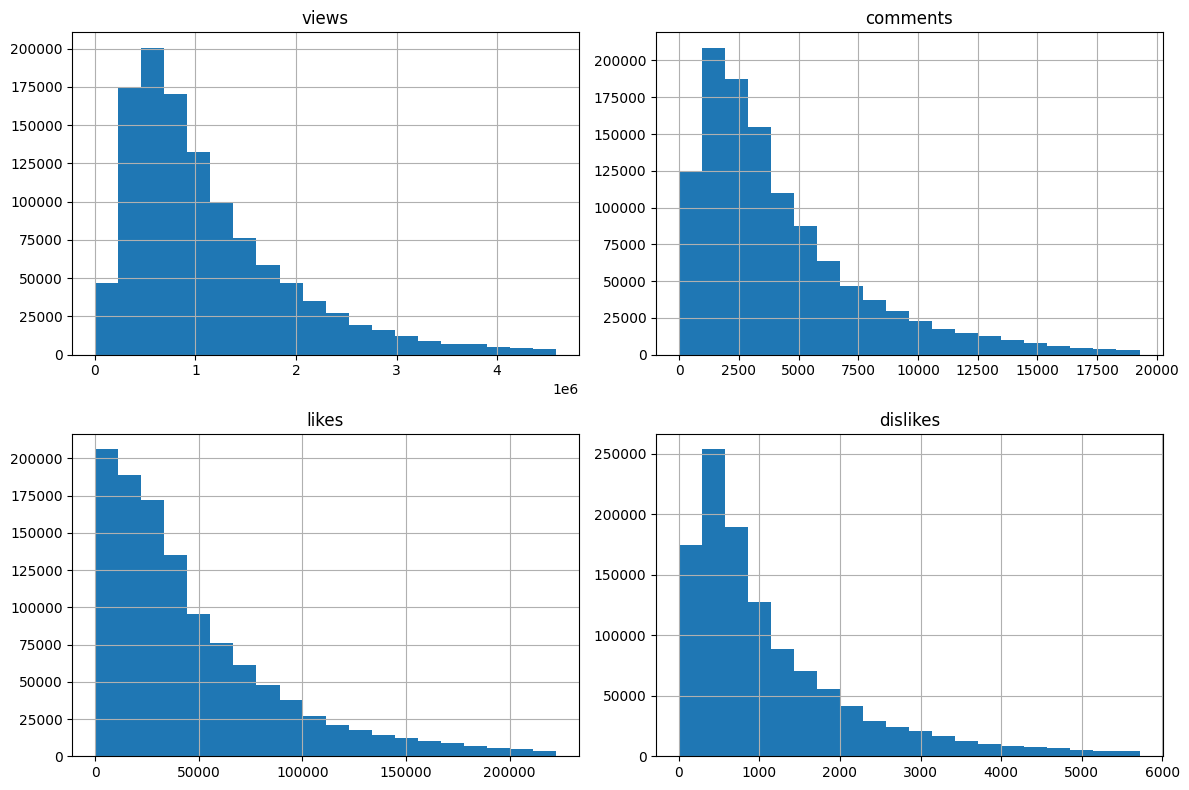

In [81]:
cols = ['views', 'comments', 'likes', 'dislikes']
df[cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

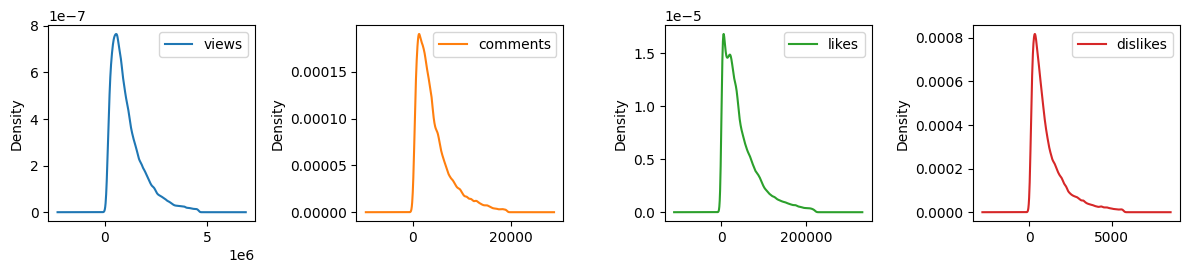

In [82]:
df[cols].plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(12, 10))
plt.tight_layout()
plt.show()

# Split data

In [91]:
from sklearn.model_selection import train_test_split

train_ratio = 0.75
val_ratio = 0.15
test_ratio = 0.1

videos_id = df['ytvideoid'].unique()

train_ids, test_ids = train_test_split(videos_id, test_size = 1-train_ratio)
val_ids, test_ids = train_test_split(test_ids, test_size = test_ratio/(test_ratio+val_ratio))

train_df = df[df['ytvideoid'].isin(train_ids)]
val_df = df[df['ytvideoid'].isin(val_ids)]
test_df = df[df['ytvideoid'].isin(test_ids)]

print(f'Train size: {len(train_df)}\nVal size: {len(val_df)}\nTest size: {len(test_df)}')

Train size: 862269
Val size: 174518
Test size: 115927


In [103]:
print(len(train_ids))
print(len(val_ids))
print(len(test_ids))

6769
1354
903


In [92]:
train_df.to_csv('train_data.csv', index=False)
val_df.to_csv('val_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)